In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_pickle("found_data.pkl")
df_true = pd.read_pickle("true_data.pkl")

df_true["Exo_Detection"] = np.nan
df_true["Found_Period"] = np.nan
df_true["Period_Error"] = np.nan
df_true["Found_Amp"] = np.nan
df_true["Amp_Error"] = np.nan

In [2]:
for index, row in df_true.iterrows():
    star = df_true.iloc[index]['Star']
    period = df_true.iloc[index]['True_Period']
    exostriker = df.loc[df['Star'] == star]
    for i in range(0, len(exostriker)):
        found_per = exostriker.iloc[i]['Found_Period']
        if found_per < period*1.05 and found_per > period*0.95:
            df_true.at[index, "Exo_Detection"] = 1 #found
            df_true.at[index, "Found_Period"] = exostriker.iloc[i]['Found_Period']
            df_true.at[index, "Period_Error"] = exostriker.iloc[i]['Period_Error']
            df_true.at[index, "Found_Amp"] = exostriker.iloc[i]['Found_Amp']
            df_true.at[index, "Amp_Error"] = exostriker.iloc[i]['Amp_Error']

pd.set_option("display.max_rows", None, "display.max_columns", None)

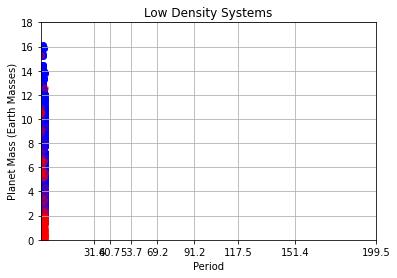

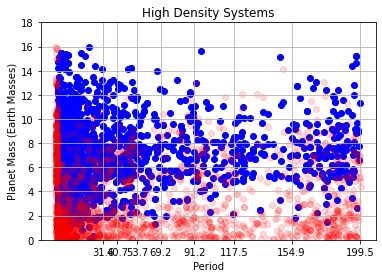

In [9]:
#low density
df_low = df_true[df_true['Total_Planet'] <= 4]
df_detected_low = df_low[df_low['Exo_Detection'] == 1]
df_undetected_low = df_low[df_low['Exo_Detection'] != 1]
detected_mass_low = df_detected_low['Planet_Mass']
detected_period_low = df_detected_low['True_Period']
undetected_mass_low = df_undetected_low['Planet_Mass']
undetected_period_low = df_undetected_low['True_Period']

natural_val = np.linspace(min(detected_period_low), np.log10(max(detected_period_low)), num=8, endpoint=True).round(decimals=2)
per_segments = np.array([10**x for x in natural_val]).round(decimals=2)

plt.scatter(np.log10(detected_period_low), detected_mass_low, color = 'b', alpha=1) #blue for detected by exostriker
plt.scatter(np.log10(undetected_period_low), undetected_mass_low, color = 'r', alpha=0.15) #red for not detected by exostriker  
plt.grid(True)
plt.ylim(0, 18,2)
#plt.xlim(0, 200,25)
plt.xticks(per_segments)
plt.xlabel('Period')
plt.ylabel("Planet Mass (Earth Masses)")
plt.title("Low Density Systems")
plt.savefig('periodvmass_low.png')
plt.show()

#high density
df_high = df_true[df_true['Total_Planet'] > 4]
df_detected_high = df_high[df_high['Exo_Detection'] == 1]
df_undetected_high = df_high[df_high['Exo_Detection'] != 1]
detected_mass_high = df_detected_high['Planet_Mass']
detected_period_high = df_detected_high['True_Period']
undetected_mass_high = df_undetected_high['Planet_Mass']
undetected_period_high = df_undetected_high['True_Period']

natural_val = np.linspace(min(detected_period_high), np.log10(max(detected_period_high)), num=8, endpoint=True).round(decimals=2)
per_segments = np.array([10**x for x in natural_val]).round(decimals=2)

plt.scatter(detected_period_high, detected_mass_high, color = 'b', alpha=1) #blue for detected by exostriker
plt.scatter(undetected_period_high, undetected_mass_high, color = 'r', alpha=0.15) #red for not detected by exostriker  
plt.grid(True)
plt.ylim(0, 18,2)
#plt.xlim(0, 200,25)
plt.xticks(per_segments)
plt.xlabel('Period')
plt.ylabel("Planet Mass (Earth Masses)")
plt.title('High Density Systems')
plt.savefig('periodvmass_high.png')
plt.show()

In [13]:
print(len(df_high), len(df_detected_high), len(df_undetected_high), len(df_low), len(df_detected_low), len(df_undetected_low), len(df_true))
print("Percentage of undetected planets within high density system: {}".format(len(df_undetected_high)/len(df_high)))
print("Percentage of undetected planets within low density system: {}".format(len(df_undetected_low)/len(df_low)))
print("Percentage of undetected planets in high density system out of all undetected: {}".format(len(df_undetected_high)/2117))

4027 2180 1847 1364 1094 270 5391
Percentage of undetected planets within high density system: 0.4586540849267445
Percentage of undetected planets within low density system: 0.19794721407624633
Percentage of undetected planets in high density system out of all undetected: 0.872461029759093
Percentage of undetected planets in low density system out of all undetected: 0.12753897024090693


In [4]:
#low density
color_low = []
for i in range(0,18,2):
    detected_mass_row = df_detected_low[df_detected_low['Planet_Mass'] <= i+2][df_detected_low['Planet_Mass'] > i]
    undetected_mass_row = df_undetected_low[df_undetected_low['Planet_Mass'] <= i+2][df_undetected_low['Planet_Mass'] > i]
    for j in range(0,200,25):
        mass_period_cell = detected_mass_row[detected_mass_row['True_Period'] <= j+25][detected_mass_row['True_Period'] > j]
        undetected_cell = undetected_mass_row[undetected_mass_row['True_Period'] <= j+25][undetected_mass_row['True_Period'] > j]
        cell_sum = len(mass_period_cell) + len(undetected_cell)
        if cell_sum == 0:
            color_low.append(1)
        else:
            detected_fraction = len(mass_period_cell)/cell_sum
            if detected_fraction == 0: #red none detected
                color_low.append('red')
            if detected_fraction > 0 and detected_fraction <= 0.1: #yellow less than 1% detected
                color_low.append('yellow')
            if detected_fraction > 0.1 and detected_fraction <= 0.5: #green less than 5%
                color_low.append('green')
            if detected_fraction > 0.5 and detected_fraction <= 0.8: #blue less than 8%
                color_low.append('blue')
            if detected_fraction > 0.8 and detected_fraction != 1:
                color_low.append('black') #black more than 8%  
            if detected_fraction == 1:
                color_low.append('orange') #orange all detected
                
#high density
color_high = []
for i in range(0,18,2):
    detected_mass_row = df_detected_high[df_detected_high['Planet_Mass'] <= i+2][df_detected_high['Planet_Mass'] > i]
    undetected_mass_row = df_undetected_high[df_undetected_high['Planet_Mass'] <= i+2][df_undetected_high['Planet_Mass'] > i]
    for j in range(0,200,25):
        mass_period_cell = detected_mass_row[detected_mass_row['True_Period'] <= j+25][detected_mass_row['True_Period'] > j]
        undetected_cell = undetected_mass_row[undetected_mass_row['True_Period'] <= j+25][undetected_mass_row['True_Period'] > j]
        cell_sum = len(mass_period_cell) + len(undetected_cell)
        if cell_sum == 0:
            color_high.append(1)
        else:
            detected_fraction = len(mass_period_cell)/cell_sum
            if detected_fraction == 0: #red none detected
                color_high.append('red')
            if detected_fraction > 0 and detected_fraction <= 0.1: #yellow less than 1% detected
                color_high.append('yellow')
            if detected_fraction > 0.1 and detected_fraction <= 0.5: #green less than 5%
                color_high.append('green')
            if detected_fraction > 0.5 and detected_fraction <= 0.8: #blue less than 8%
                color_high.append('blue')
            if detected_fraction > 0.8 and detected_fraction != 1:
                color_high.append('black') #black more than 8%  
            if detected_fraction == 1:
                color_high.append('orange') #orange all detected

<ipython-input-4-61519fcc10eb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  detected_mass_row = df_detected_low[df_detected_low['Planet_Mass'] <= i+2][df_detected_low['Planet_Mass'] > i]
<ipython-input-4-61519fcc10eb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  undetected_mass_row = df_undetected_low[df_undetected_low['Planet_Mass'] <= i+2][df_undetected_low['Planet_Mass'] > i]
<ipython-input-4-61519fcc10eb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mass_period_cell = detected_mass_row[detected_mass_row['True_Period'] <= j+25][detected_mass_row['True_Period'] > j]
<ipython-input-4-61519fcc10eb>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  undetected_cell = undetected_mass_row[undetected_mass_row['True_Period'] <= j+25][undetected_mass_row['True_Period'] > j]
<ipython-input-4-61519fcc10eb>:7: UserWarning: Boolean Series key will be reindexed

<ipython-input-4-61519fcc10eb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mass_period_cell = detected_mass_row[detected_mass_row['True_Period'] <= j+25][detected_mass_row['True_Period'] > j]
<ipython-input-4-61519fcc10eb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mass_period_cell = detected_mass_row[detected_mass_row['True_Period'] <= j+25][detected_mass_row['True_Period'] > j]
<ipython-input-4-61519fcc10eb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  detected_mass_row = df_detected_low[df_detected_low['Planet_Mass'] <= i+2][df_detected_low['Planet_Mass'] > i]
<ipython-input-4-61519fcc10eb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  undetected_mass_row = df_undetected_low[df_undetected_low['Planet_Mass'] <= i+2][df_undetected_low['Planet_Mass'] > i]
<ipython-input-4-61519fcc10eb>:7: UserWarning: Boolean Series key will be reindexed to m

<ipython-input-4-61519fcc10eb>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  undetected_mass_row = df_undetected_high[df_undetected_high['Planet_Mass'] <= i+2][df_undetected_high['Planet_Mass'] > i]
<ipython-input-4-61519fcc10eb>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mass_period_cell = detected_mass_row[detected_mass_row['True_Period'] <= j+25][detected_mass_row['True_Period'] > j]
<ipython-input-4-61519fcc10eb>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  undetected_cell = undetected_mass_row[undetected_mass_row['True_Period'] <= j+25][undetected_mass_row['True_Period'] > j]
<ipython-input-4-61519fcc10eb>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mass_period_cell = detected_mass_row[detected_mass_row['True_Period'] <= j+25][detected_mass_row['True_Period'] > j]
<ipython-input-4-61519fcc10eb>:34: UserWarning: Boolean Series key wil

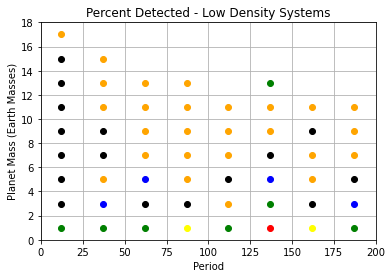

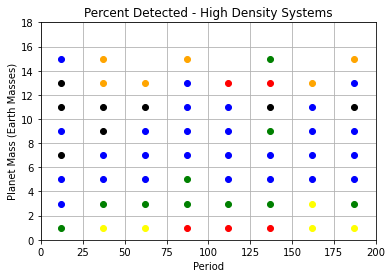

In [5]:
#low density
index = 0
for i in range(1,19,2):
    for j in range(12,212,25):
        if color_low[index] != 1:
            plt.scatter(j,i, color = color_low[index])
            index = index + 1
        else:
            index = index + 1
plt.ylim(0, 18, 2)
plt.xlim(0, 200,25)
plt.grid(True)
plt.xlabel('Period')
plt.ylabel("Planet Mass (Earth Masses)")
plt.title('Percent Detected - Low Density Systems')
plt.show()

#high density
index = 0
for i in range(1,19,2):
    for j in range(12,212,25):
        if color_high[index] != 1:
            plt.scatter(j,i, color = color_high[index])
            index = index + 1
        else:
            index = index + 1
plt.ylim(0, 18, 2)
plt.xlim(0, 200,25)
plt.grid(True)
plt.xlabel('Period')
plt.ylabel("Planet Mass (Earth Masses)")
plt.title('Percent Detected - High Density Systems')
plt.show()

<ipython-input-27-1d31bc121f04>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mass_row = df_undetected_high[df_undetected_high['Planet_Mass'] <= row+2][df_undetected_high['Planet_Mass'] > row]
<ipython-input-27-1d31bc121f04>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mass_period_cell = mass_row[mass_row['True_Period'] <= col+25][mass_row['True_Period'] > col]


     Star  Found_Period  Period_Error  Found_Amp  Amp_Error
464   124      2.940021      0.000087   8.421829   0.610077
465   124      7.483903      0.000662   6.214329   0.949438
466   124      7.828409      0.001166   4.219413   0.689385
      Star  Total_Planet  True_Period  True_Amp  Transit  Detect  Planet_Mass  \
666  124.0             7         0.88  7.129900      1.0     1.0          5.9   
667  124.0             7         2.94  8.394998      1.0     1.0         10.4   
668  124.0             7         7.83  3.555043      0.0  -100.0          6.1   
669  124.0             7        18.93  2.559247      0.0  -100.0          5.9   
670  124.0             7        34.02  2.391460      0.0  -100.0          6.7   
671  124.0             7        80.96  2.380879      0.0  -100.0          8.9   
672  124.0             7       176.51  1.648613      0.0  -100.0          8.0   

     Major_Axis  Exo_Detection  Found_Period  Period_Error  Found_Amp  \
666         6.4            NaN        

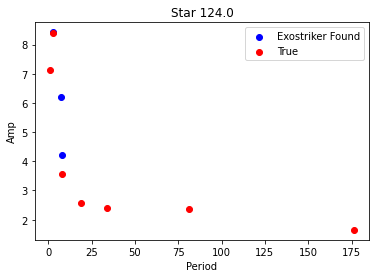

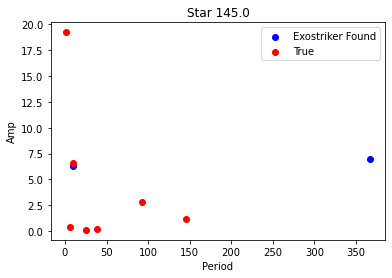

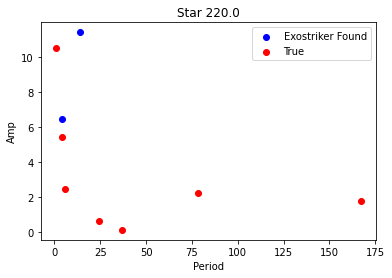

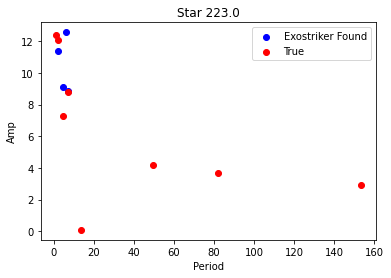

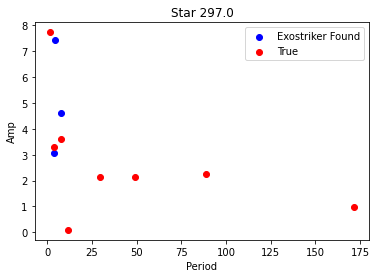

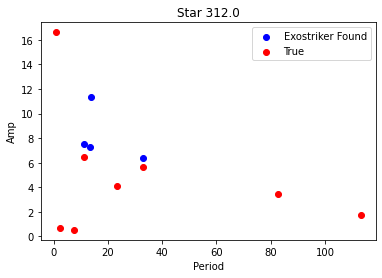

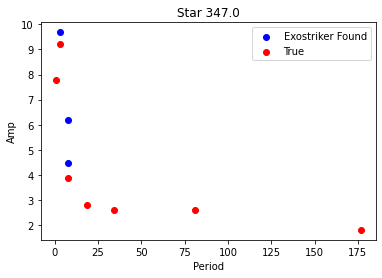

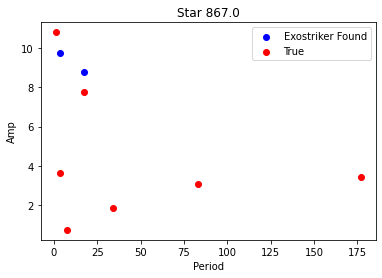

In [27]:
#red none detected
#yellow less than equal to 1% detected
#green less than equal to 5%
#blue less than equal to 8%
#black more than 8%
#orange all detected

#dataframes for high density systems (>4) that contain an "undetected" planet (ie period > 5%)

#Identify systems for high density for the undetected: 
#print their systems true and found (exostriker) data frame 
    

row = 8
col = 75
mass_row = df_undetected_high[df_undetected_high['Planet_Mass'] <= row+2][df_undetected_high['Planet_Mass'] > row]
mass_period_cell = mass_row[mass_row['True_Period'] <= col+25][mass_row['True_Period'] > col]
star_id = list(mass_period_cell['Star'])
for i in star_id:
    exostriker = df[df.Star == i]
    true = df_true[df_true.Star == i]
    print(exostriker)
    print(true)
    plt.figure()
    plt.scatter(exostriker['Found_Period'], exostriker['Found_Amp'], color = 'b', label = 'Exostriker Found')
    plt.scatter(true['True_Period'], true['True_Amp'], color = 'r', label = 'True')
    plt.xlabel('Period')
    plt.ylabel("Amp")
    plt.title('Star {}'.format(i))
    plt.legend()
    plt.show

In [ ]:
#How does this change the amp of planets that transit?? In spare vs dense 